In [14]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from importlib import reload
plt.rcParams["legend.loc"] = "upper left"
plt.rcParams['text.usetex'] = True

from files.gradient_approximation import *
from files.optimizers import *
from files.sets import *
from files.utils import *
from files.run_experiments import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## None-stochastic FW LogReg on Simplex (Mushrooms)

In [2]:
func_name = "logreg"
d = 112
seed = 42
sigma = 0
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [3]:
def learning_rate(k):
    return 1 / L

In [4]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:41<00:00, 24.01it/s]


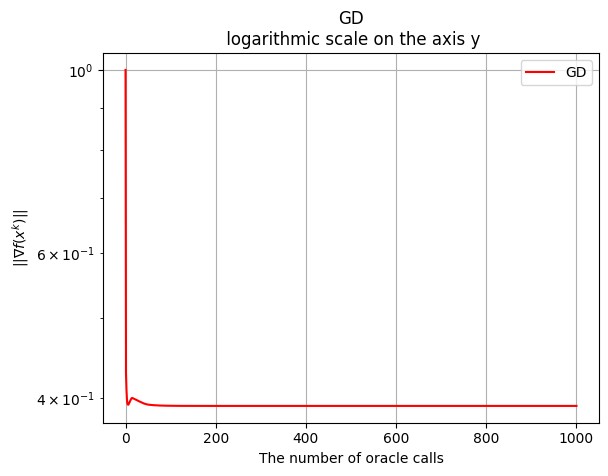

0.4968661761047626


In [5]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [6]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + L)

def learning_rate_lame(k):
    return (2 * np.sqrt(k) + 1) / (k + L)

def learning_rate_turtle(k):
    return 1 / (k + L)

In [7]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [8]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [14:16<00:00, 19.46s/it]


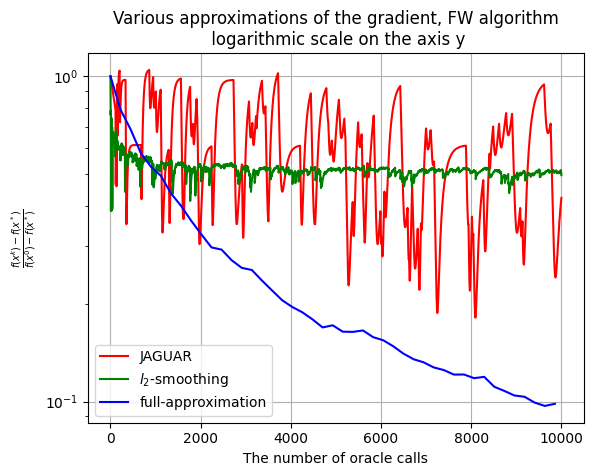

In [9]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_Simplex_Mushrooms")

## None-stochastic FW LogReg on Simplex (MNIST)

In [15]:
func_name = "logreg"
d = 719
seed = 42
sigma = 0
sett = Simplex()
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [16]:
def learning_rate(k):
    return 1 / L

In [17]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:32<00:00, 31.02it/s]


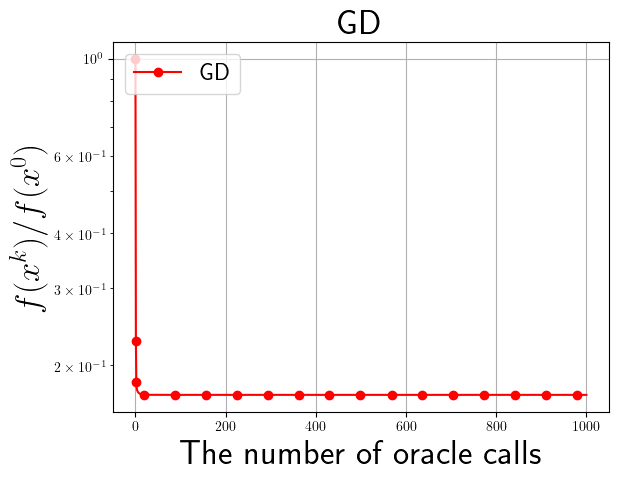

0.31027867912819795


In [18]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [19]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 2 / (k + 10)

In [20]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [21]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:54<00:00, 19.16s/it]


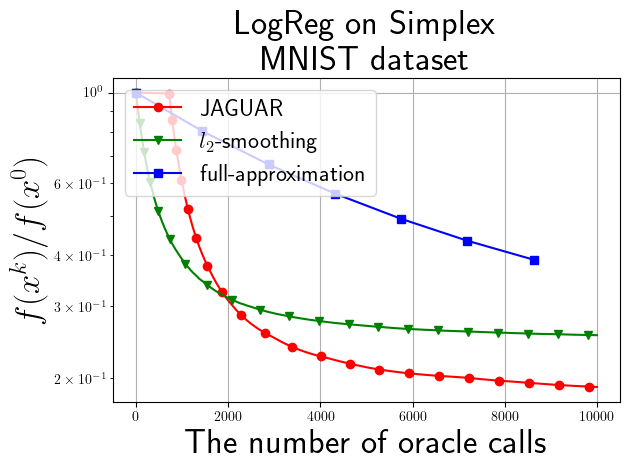

In [22]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_LogReg_Simplex_MNIST")

## None-stochastic FW Reg on Simplex

In [18]:
func_name = "quadratic"
d = 200
seed = 42
sigma = 0
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [19]:
def learning_rate(k):
    return 1 / L

In [21]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████| 10000/10000 [06:21<00:00, 26.19it/s]


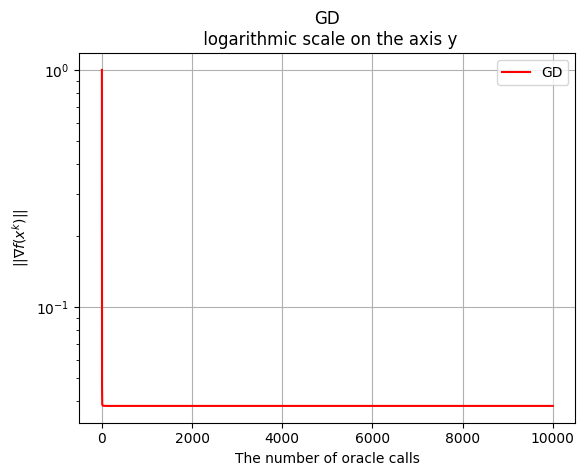

0.09419722437300941


In [22]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [23]:
def learning_rate_jaguar(k):
    return 1 / (k + 100)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 100)

In [24]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [25]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5*10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████| 125/125 [01:37<00:00,  1.28it/s]


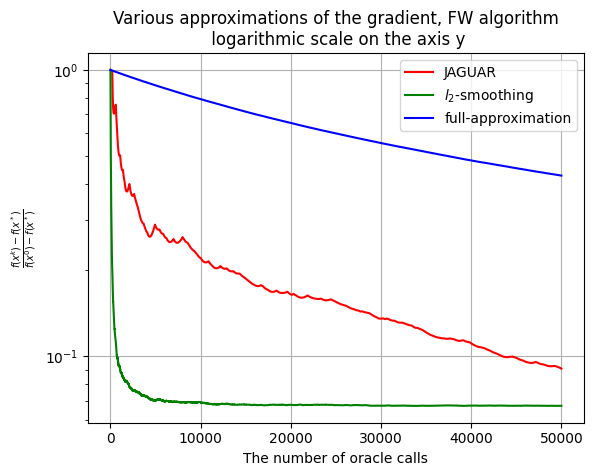

In [26]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_Reg_Simplex")

## None-stochastic FW SVM on Simplex (Mushrooms)

In [27]:
func_name = "SVM"
d = 112
seed = 42
sigma = 0
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [28]:
def learning_rate_jaguar(k):
    return 1 / (k + 200)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 10)

In [29]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [30]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:24<00:00,  1.80it/s]


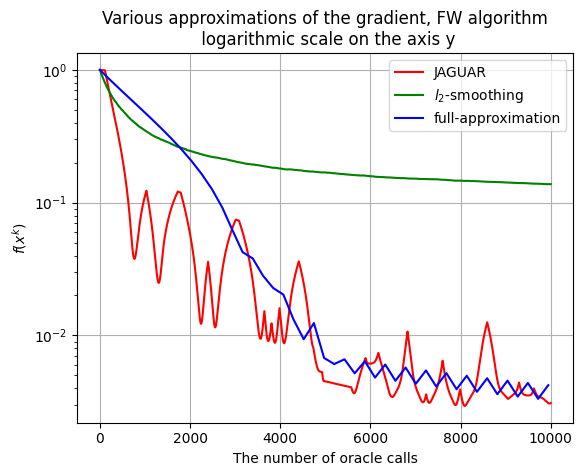

In [31]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_Simplex_Mushrooms")

## None-stochastic FW SVM on Simplex (MNIST)

In [9]:
func_name = "SVM"
d = 719
seed = 42
sigma = 0
sett = Simplex()
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [10]:
def learning_rate_jaguar(k):
    return 1 / (k + 750)

def learning_rate_lame(k):
    return 1 / (2 * k + 500)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2.5 * k + 5)

In [11]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [12]:
Jaguar = JaguarApproximator(oracle, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]


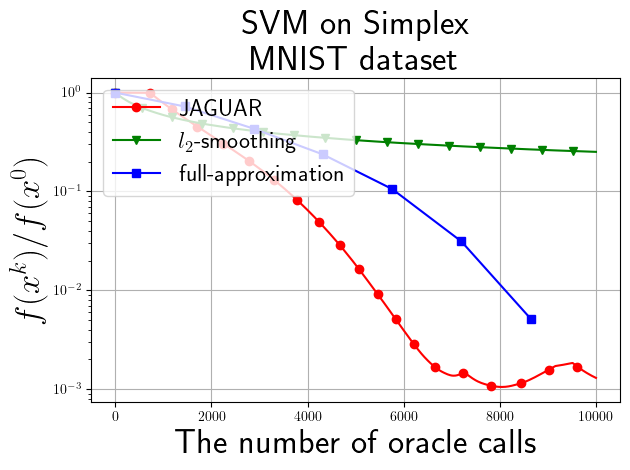

In [13]:
make_err_plot(optimizers_list, save_name="None_stochastics_FW_SVM_Simplex_MNIST")

## Stochastic OPF FW LogReg on Simplex (Mushrooms)

In [37]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [38]:
def learning_rate(k):
    return 1 / L

In [39]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:20<00:00, 49.53it/s]


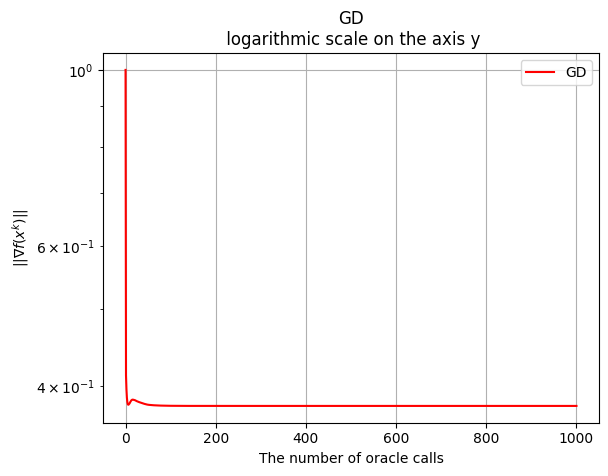

0.4968661761047624


In [40]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [41]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [42]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [43]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [44]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [00:41<00:00,  1.88s/it]


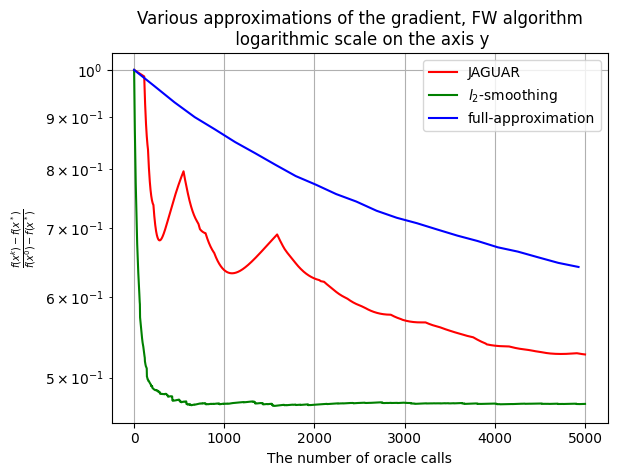

In [45]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_Simplex_Mushrooms")

## Stochastic OPF FW LogReg on Simplex (MNIST)

In [46]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [47]:
def learning_rate(k):
    return 1 / L

In [48]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [01:11<00:00, 14.06it/s]


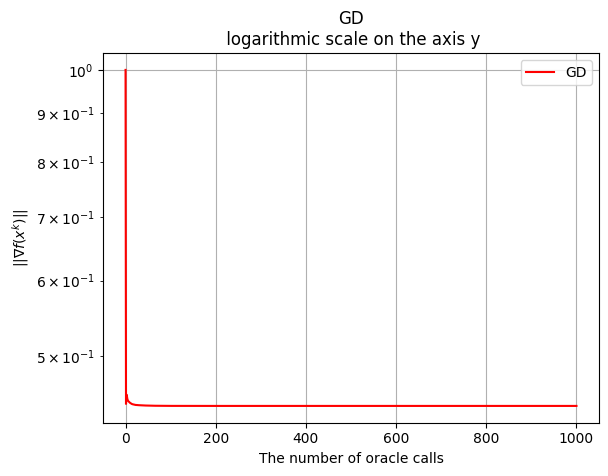

0.31027867912819784


In [49]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [50]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [51]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [52]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [53]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 3/3 [03:11<00:00, 63.91s/it]


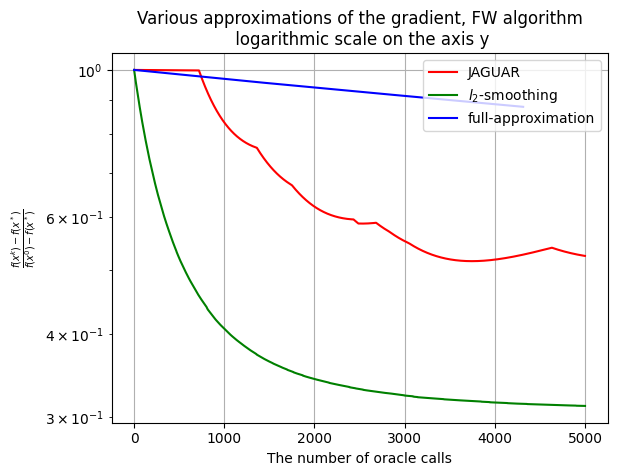

In [54]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_LogReg_Simplex_MNIST")

## Stochastic OPF FW Reg on Simplex

In [55]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [56]:
def learning_rate(k):
    return 1 / L

In [57]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|█████████████████████████████████████| 10000/10000 [06:35<00:00, 25.30it/s]


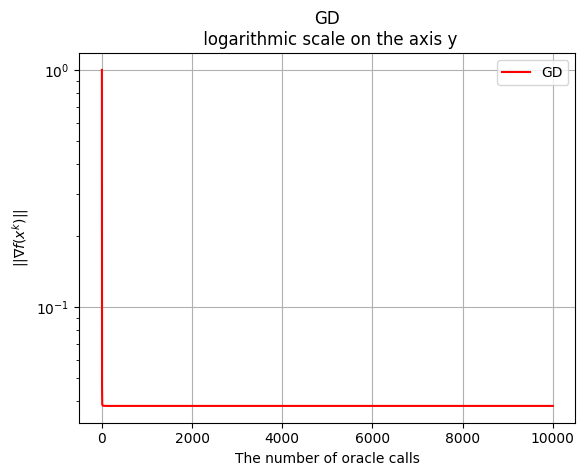

0.09419722437300941


In [58]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [59]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [60]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [61]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [62]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [03:11<00:00,  7.67s/it]


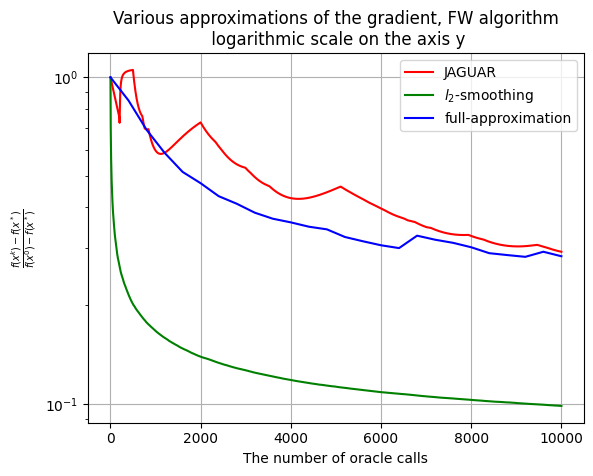

In [63]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_Reg_Simplex")

## Stochastic OPF FW SVM on Simplex (Mushrooms)

In [64]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = Simplex()

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [65]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [66]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [67]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [68]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [03:18<00:00,  4.52s/it]


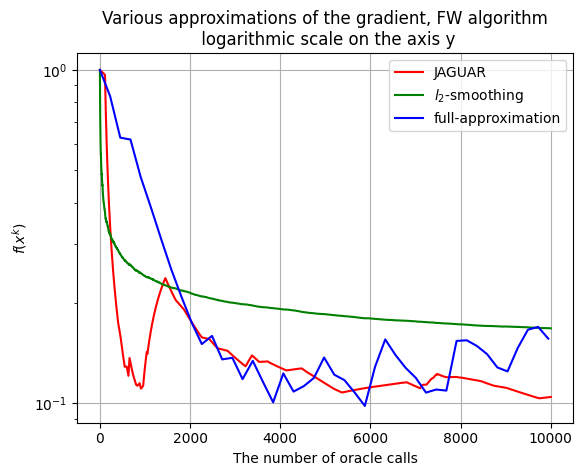

In [69]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_Simplex_Mushrooms")

## Stochastic OPF FW SVM on Simplex (MNIST)

In [70]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = Simplex()

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [71]:
def learning_rate_jaguar(k):
    return (np.sqrt(k) + 1) / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [72]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [73]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="opf", args=args)

In [74]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [02:59<00:00, 29.86s/it]


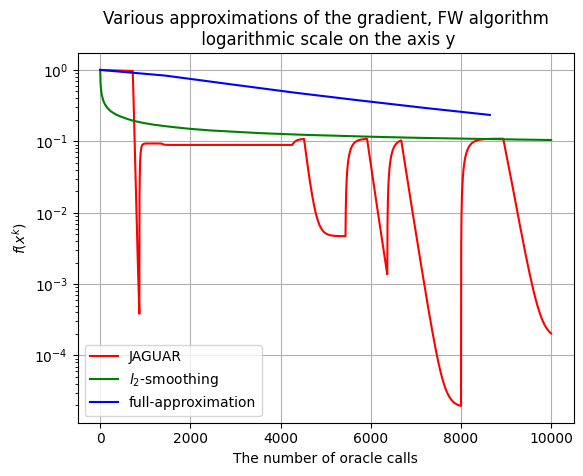

In [75]:
make_err_plot(optimizers_list, save_name="Stochastics_OPF_FW_SVM_Simplex_MNIST")

## Stochastic TPF FW LogReg on Simplex (Mushrooms)

In [76]:
func_name = "logreg"
d = 112
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [77]:
def learning_rate(k):
    return 1 / L

In [78]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:46<00:00, 21.34it/s]


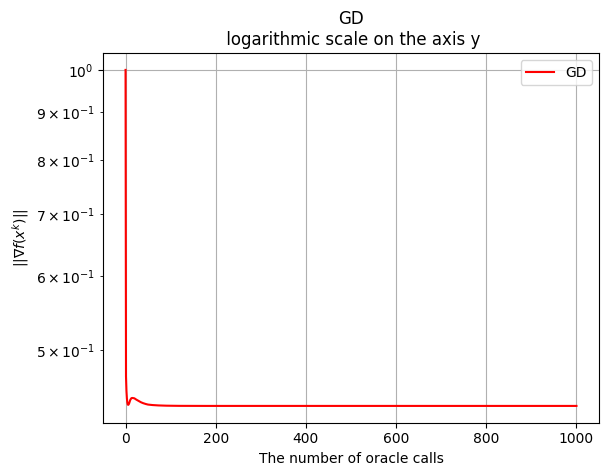

0.4968661761047623


In [79]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [80]:
def learning_rate_jaguar(k):
    return 1 / (k + 50)

def learning_rate_lame(k):
    return 1 / (k + 20)

def learning_rate_turtle(k):
    return 1 / (k + 20)

In [81]:
def momentum_k(k):
    return 2 * k / (2 * k + 100)

In [82]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [83]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=5 * 10**3)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 22/22 [01:55<00:00,  5.26s/it]


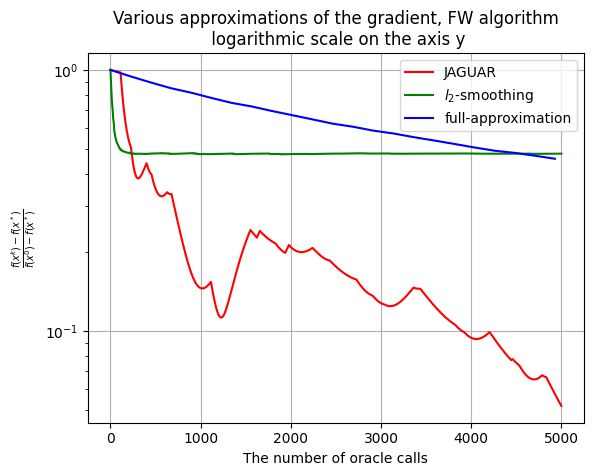

In [84]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_Simplex_Mushrooms")

## Stochastic TPF FW LogReg on Simplex (MNIST)

In [23]:
func_name = "logreg"
d = 719
seed = 42
sigma = 1
sett = Simplex()
L = 5.25

args = init_experiment(func_name, dataset="MNIST", d=d)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [24]:
def learning_rate(k):
    return 1 / L

In [25]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**3)
GD.optimize()

100%|███████████████████████████████████████| 1000/1000 [00:33<00:00, 29.53it/s]


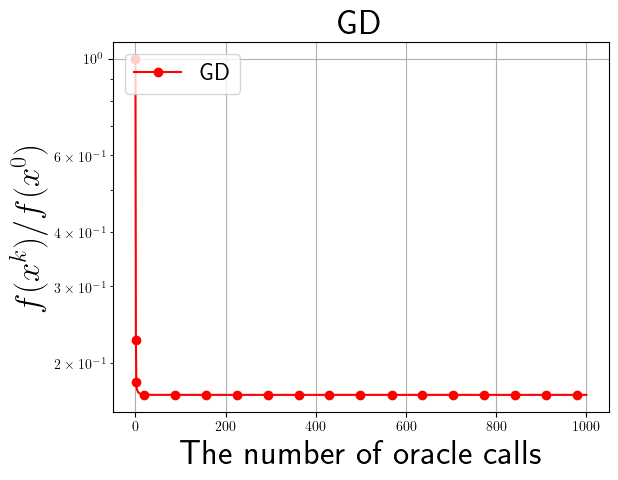

0.310278679128198


In [26]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [27]:
def learning_rate_jaguar(k):
    return 1 / (k + 500)

def learning_rate_lame(k):
    return 1 / (k + 200)

def learning_rate_turtle(k):
    return 2 / (k + 20)

In [28]:
def momentum_k(k):
    return k / (k + 50)

In [29]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [30]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [01:50<00:00, 18.47s/it]


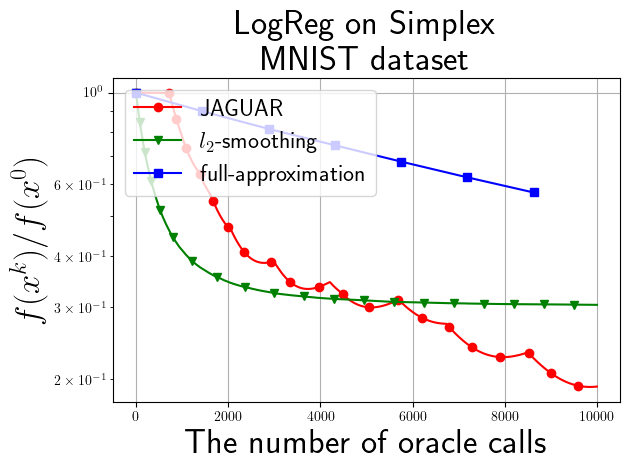

In [31]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_LogReg_Simplex_MNIST")

## Stochastic TPF FW Reg on Simplex

In [94]:
func_name = "quadratic"
d = 200
seed = 101
sigma = 1
sett = Simplex()
L = 1000
mu = 1

args = init_experiment(func_name, d=d, L=L, mu=mu)

x_0 = np.random.random(size=d)
x_0 = x_0 / np.linalg.norm(x_0)

In [95]:
def learning_rate(k):
    return 1 / L

In [96]:
TrueGradient = TrueGradientApproximator(args=args) 
GD = GDOptimizer(TrueGradient, learning_rate, x_0, sett, max_oracle_calls=10**4)
GD.optimize()

100%|████████████████████████████████████| 10000/10000 [00:41<00:00, 239.62it/s]


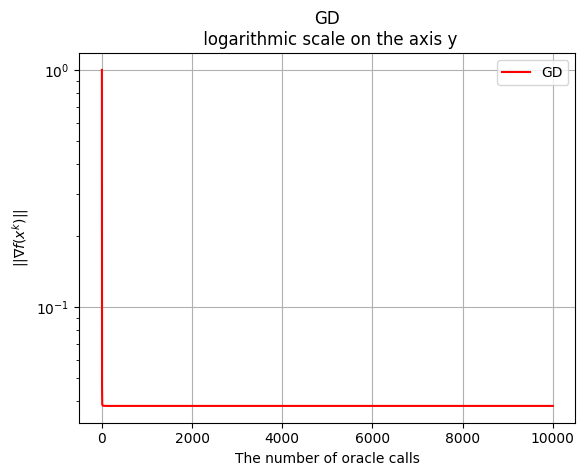

0.09419722437300941


In [97]:
make_err_plot([GD], title="GD", labels=["GD"])
x_sol = GD.x_curr
print(np.linalg.norm(x_sol))

In [98]:
def learning_rate_jaguar(k):
    return 1 / (k + 3)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [99]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [100]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [101]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, x_sol=x_sol, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 25/25 [00:09<00:00,  2.56it/s]


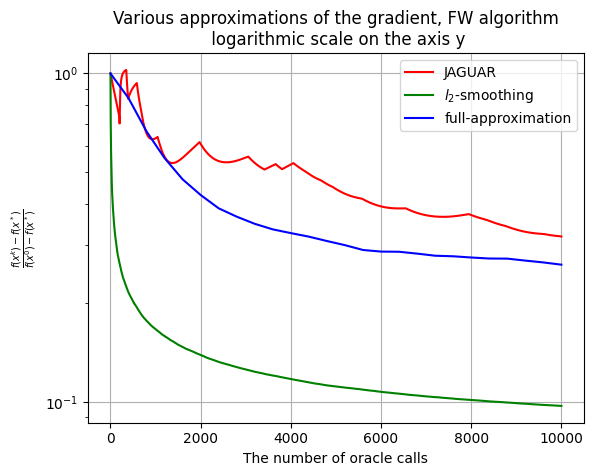

In [102]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_Reg_Simplex")

## Stochastic TPF FW SVM on Simplex (Mushrooms)

In [103]:
func_name = "SVM"
d = 112
seed = 101
sigma = 1
sett = Simplex()

args = init_experiment(func_name, d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [104]:
def learning_rate_jaguar(k):
    return 1 / (k + 30)

def learning_rate_lame(k):
    return 1 / (3 * k + 6)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 6)

In [105]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [106]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [107]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|███████████████████████████████████████████| 44/44 [00:20<00:00,  2.12it/s]


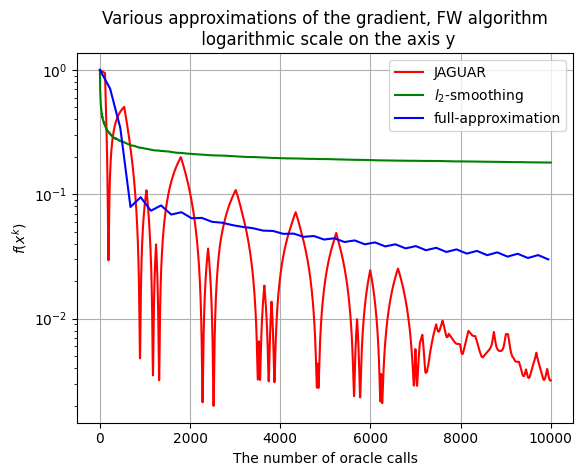

In [108]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_Simplex_Mushrooms")

## Stochastic TPF FW SVM on Simplex (MNIST)

In [32]:
func_name = "SVM"
d = 719
seed = 101
sigma = 1
sett = Simplex()

args = init_experiment(func_name, dataset="MNIST", d=d, alpha=2)

x_0 = np.random.random(size=d+1)
x_0 = x_0 / np.linalg.norm(x_0)

In [33]:
def learning_rate_jaguar(k):
    return 1 / (k + 1000)

def learning_rate_lame(k):
    return 1 / (k + 10)

def learning_rate_turtle(k):
    return (np.sqrt(k) + 1) / (2 * k + 7)

In [34]:
def momentum_k(k):
    return 0.95 * k / (k + 10)

In [35]:
oracle = ZO_oracle(func_name, sigma, oracle_mode="tpf", args=args)

In [36]:
Jaguar = JaguarApproximator(oracle, momentum_k=momentum_k, gamma=1e-5)
Lame = LameApproximator(oracle, gamma=1e-5)
Turtle = TurtleApproximator(oracle, gamma=1e-5)

approx_list = [Jaguar, Lame, Turtle]
lr_list = [learning_rate_jaguar, learning_rate_lame, learning_rate_turtle]

optimizers_list = []
for approximator, lr in zip(approx_list, lr_list):
    opt = FWOptimizer(approximator, lr, x_0, sett, max_oracle_calls=10**4)
    opt.optimize()
    optimizers_list.append(opt)

100%|█████████████████████████████████████████████| 6/6 [00:05<00:00,  1.02it/s]


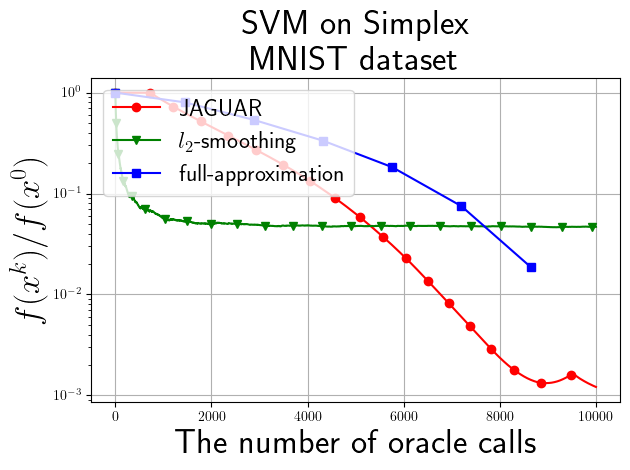

In [37]:
make_err_plot(optimizers_list, save_name="Stochastics_TPF_FW_SVM_Simplex_MNIST")